#Name: Annanya Jain

I pledge my honor that I have abided by the Stevens Honor System

In [ ]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


In [2]:
def load_face_data(file_path):
    data = []
    img_shape = (256, 256)
    D = img_shape[0] * img_shape[1]
    for i in range(178):
        if i == 103: #Since I noticed face103.bmp doesn't exist.
          continue

        img_path = os.path.join(file_path, f'face{i:03d}.bmp')
        if not os.path.exists(img_path):
          print(f"Image not found: {img_path}")
          continue

        img = Image.open(img_path).convert('L')
        img_array = np.array(img).reshape(1, D) #reshape to 1D vector
        data.append(img_array)

    data = np.vstack(data) # Creating [Ntrain, D] matrix
    training_data = data[:157] #firsst 157 --> training
    testing_data = data[157:]  #rest 20 --> testing

    return training_data, testing_data


In [3]:
def PCA_Computation(training_data, K):
    print("Computing mean face")
    mean_face = np.mean(training_data, axis=0)

    print("Centering the data")
    centered_data = training_data - mean_face

    print("Computing SVD")
    U, S, Vt = np.linalg.svd(centered_data, full_matrices=False) #Used SVD Decomposition.

    eigenfaces = Vt[:K].T #Top K eigen faces

    return eigenfaces, mean_face

In [4]:
def reconstruct(data, W, mean_face):
    # Centering testing image using mean image
    centered_data = data - mean_face

    # Projecting it onto K eigenfaces named W
    projection_on_eigenfaces = np.dot(centered_data, W)

    #Added back the mean image to obtain the approximation/reconstruction for test/new image
    # x + (x − mean_face)WW^T
    reconstructed_image = np.dot(projection_on_eigenfaces, W.T) + mean_face

    return reconstructed_image

$$ \frac{||\hat{Y} - Y||^2}{N} $$
$\hat{Y}$ is the
reconstructed face using the learned eigenfaces, Y is the testing faces and N is the total number of
testing data.

In [5]:
def reconstruction_error(testing_faces, reconstructed):
    N = testing_faces.shape[0]
    error = np.square(np.linalg.norm(reconstructed - testing_faces))/N
    return np.mean(error)

In [6]:
def vis_eigenfaces(eigenfaces):
    n = min(10, eigenfaces.shape[1])
    img_shape = (256, 256)
    fig, axes = plt.subplots(2, 5, figsize=(20, 6))
    axes = axes.ravel()

    print("Visualizing top 10 eigenfaces")
    for i in range(n):
        eigenface = eigenfaces[:, i].reshape(img_shape)
        axes[i].imshow(eigenface, cmap='gray')
        axes[i].axis('off')
    plt.show()

In [7]:
def show_reconstructed(testing, reconstructed):
    n = min(5, testing.shape[0])
    img_shape = (256, 256)
    fig, axes = plt.subplots(2, n, figsize=(20, 8))
    for i in range(n):
        test_img = testing[i].reshape(img_shape)
        axes[0, i].imshow(test_img, cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title('Testing Image')
        re_img = reconstructed[i].reshape(img_shape)
        axes[1, i].imshow(re_img, cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title('Reconstructed')
    plt.show()

In [8]:
def main():
    training_data, testing_data = load_face_data('/content/face_data')

    # Task 1: Computed PCA for K = 30 eigenface.
    K = 30
    eigenfaces, mean_face = PCA_Computation(training_data, K)
    print("Top 10 eigenfaces after computing K=30 Eigenfaces")
    vis_eigenfaces(eigenfaces)

    # Task 2: Reconstructing testing images using the eigenfaces from Task 1.
    reconstructed_test_image = reconstruct(testing_data, eigenfaces, mean_face)
    reconstructed_error = reconstruction_error(testing_data, reconstructed_test_image)
    print(f"Reconstruction error for K={K}: {reconstructed_error:.2f}")

    print("Showing testing images and reconstructed faces:")
    show_reconstructed(testing_data, reconstructed_test_image)

    # Task 3:
    print("\nTask 3: Testing different K values")
    K_vals = [10, 30, 50, 100, 150] #list containing different numbers of eigenfaces
    errors = []

    for i in K_vals:
        print(f" for K={i}: ")
        eigenfaces_i, mean_face = PCA_Computation(training_data, i)
        reconstructed_i = reconstruct(testing_data, eigenfaces_i, mean_face)
        error_i = reconstruction_error(testing_data, reconstructed_i)
        errors.append(error_i)
        print(f"Error for K={i}: {error_i:.2f}")

    # Plotting the curve to indicate the corresponding testing reconstruction error.
    plt.figure(figsize=(10, 6))
    plt.plot(K_vals, errors, 'bo-')
    plt.xlabel('Number of eigenfaces (K values)')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction Error for corresponding number of Eigenfaces')
    plt.grid(True)
    plt.show()


Computing mean face
Centering the data
Computing SVD
Top 10 eigenfaces after computing K=30 Eigenfaces
Visualizing top 10 eigenfaces


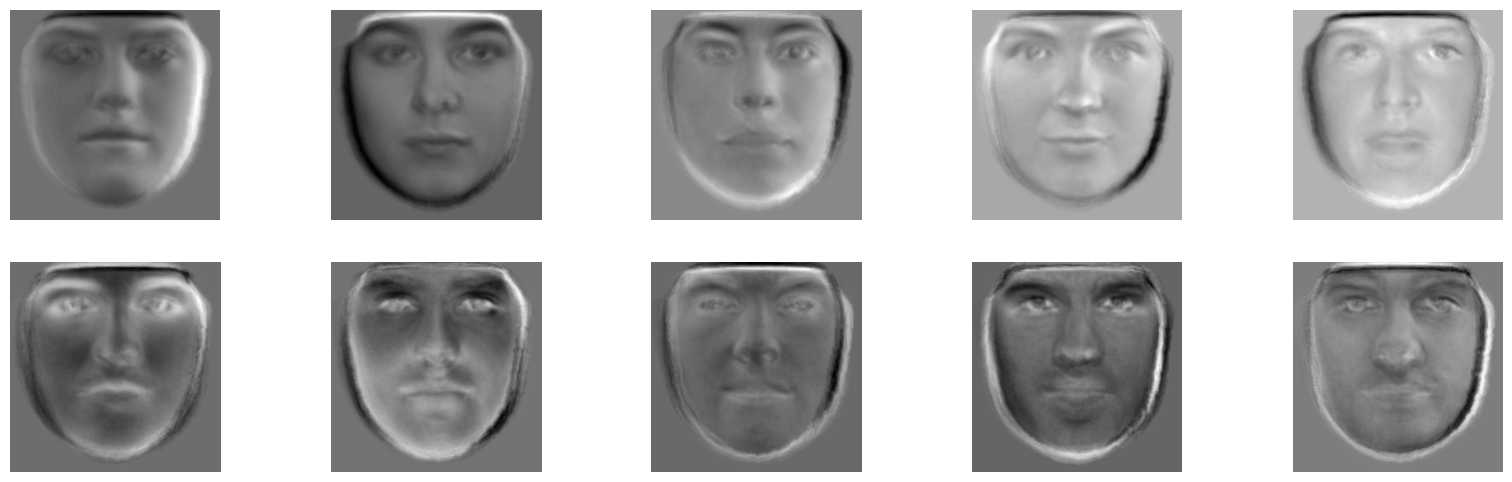

Reconstruction error for K=30: 15542981.16
Showing testing images and reconstructed faces:


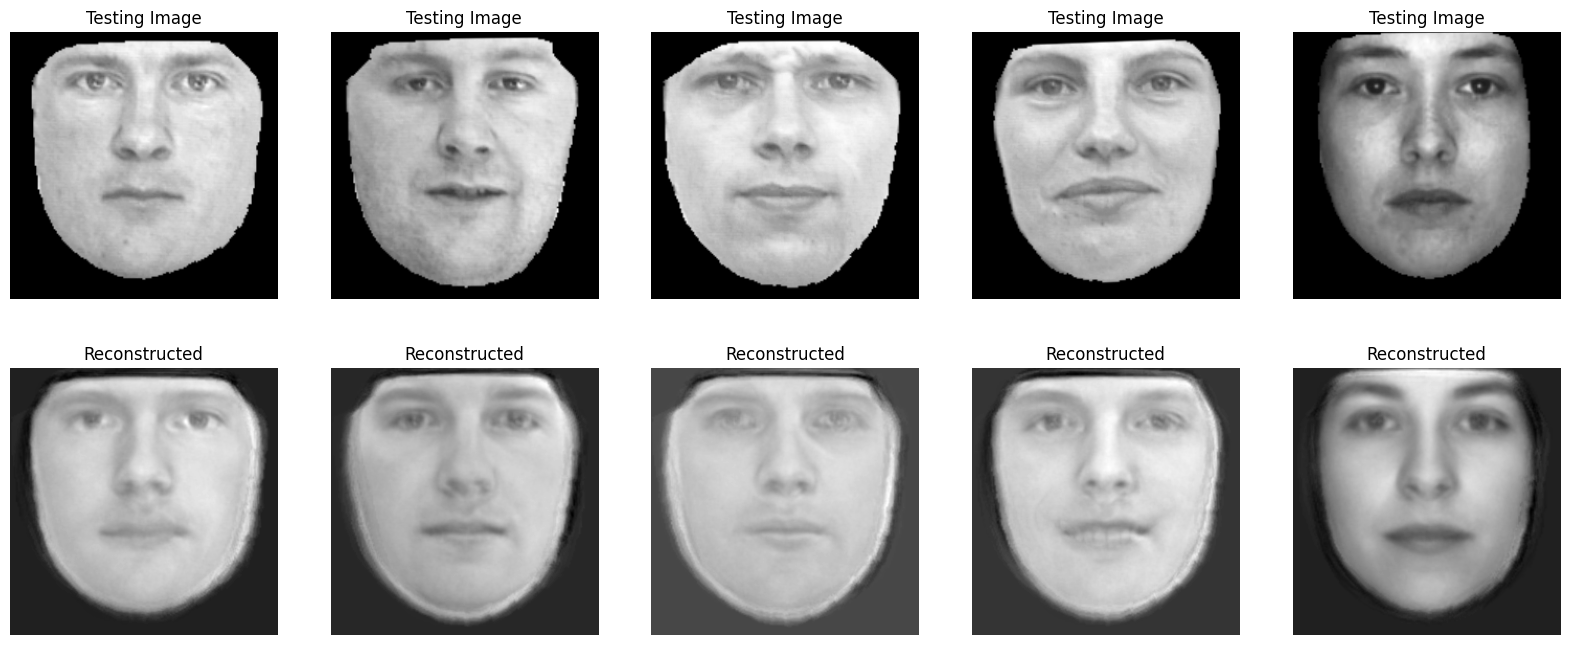


Task 3: Testing different K values
 for K=10: 
Computing mean face
Centering the data
Computing SVD
Error for K=10: 21597339.95
 for K=30: 
Computing mean face
Centering the data
Computing SVD
Error for K=30: 15542981.16
 for K=50: 
Computing mean face
Centering the data
Computing SVD
Error for K=50: 13571969.88
 for K=100: 
Computing mean face
Centering the data
Computing SVD
Error for K=100: 11212270.84
 for K=150: 
Computing mean face
Centering the data
Computing SVD
Error for K=150: 10259779.45


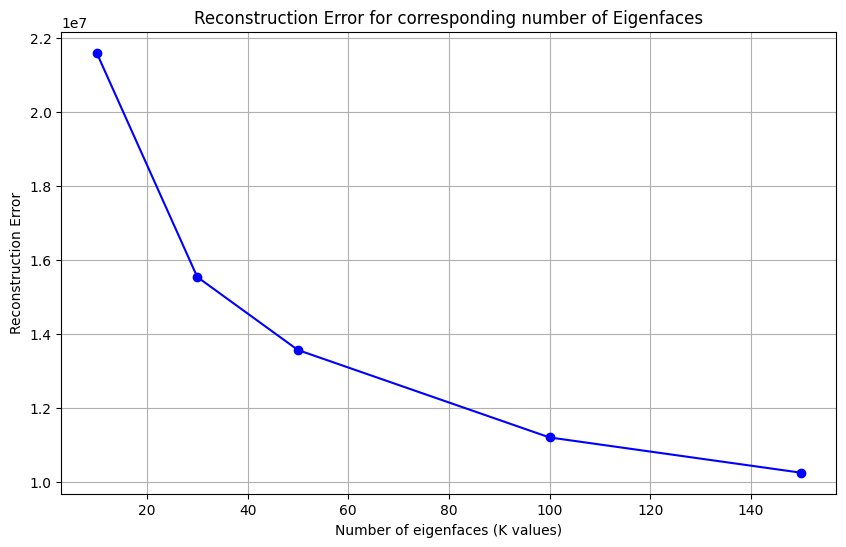

In [9]:
if __name__ == "__main__":
    main()